In [13]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import librosa

In [14]:
df = pd.read_csv("/content/drive/MyDrive/UrbanSound/UrbanSound8K.csv")
#using only a subset of the data
# df = df[df["fold"].isin([1, 2, 3, 4])]
df.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [15]:
folder_path = "/content/drive/MyDrive/UrbanSound"

folders = os.listdir(folder_path)
print(folders)

['UrbanSound8K.csv', 'fold10', 'fold2', 'fold4', 'fold3', 'fold5', 'fold6', 'fold7', 'fold9', 'fold8', 'fold1', '.ipynb_checkpoints']


In [16]:
folder_pths = []
#using only a subset for base model will use whole data for final model
for i in folders:
  # if not i in([ 'fold5', 'fold6', 'fold7', 'fold9', 'fold8', 'fold10']):
    folder_pths.append(os.path.join(folder_path, i))

print(folder_pths)

['/content/drive/MyDrive/UrbanSound/UrbanSound8K.csv', '/content/drive/MyDrive/UrbanSound/fold10', '/content/drive/MyDrive/UrbanSound/fold2', '/content/drive/MyDrive/UrbanSound/fold4', '/content/drive/MyDrive/UrbanSound/fold3', '/content/drive/MyDrive/UrbanSound/fold5', '/content/drive/MyDrive/UrbanSound/fold6', '/content/drive/MyDrive/UrbanSound/fold7', '/content/drive/MyDrive/UrbanSound/fold9', '/content/drive/MyDrive/UrbanSound/fold8', '/content/drive/MyDrive/UrbanSound/fold1', '/content/drive/MyDrive/UrbanSound/.ipynb_checkpoints']


In [17]:
import random

data_paths = []

# Loop through the first 11 folder paths
for curr_folder_path in folder_pths[:11]:

    if curr_folder_path == "/content/drive/MyDrive/UrbanSound/UrbanSound8K.csv":
        continue

    curr_files = os.listdir(curr_folder_path)

    # Use list comprehension to generate file paths
    file_paths = [os.path.join(curr_folder_path, file) for file in curr_files]

    # Iterate over file paths and extract class IDs
    for curr_file, file_path in zip(curr_files, file_paths):
        class_id = df[df['slice_file_name'] == curr_file]['classID'].values
        if len(class_id) == 0:
            continue
        data_paths.append([file_path, class_id[0]])


In [18]:
def create_spectrogram(file_path):
    y, sr = librosa.load(file_path)
    spec = librosa.feature.melspectrogram(y=y, sr=sr)
    spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv, data_paths[i][1]

print(f"{len(data_paths)} total spectograms")

spectrograms = []  # List to hold spectrogram and label tuples

for i, (file_path, label) in enumerate(data_paths):
    spec, label = create_spectrogram(file_path)
    spectrograms.append((spec, label))

    if i % 100 == 0 and i != 0:
        print(f"{i} spectrograms created!")

final_df = pd.DataFrame(spectrograms, columns=["spec", "label"])

8732 total spectograms
100 spectrograms created!
200 spectrograms created!
300 spectrograms created!
400 spectrograms created!
500 spectrograms created!
600 spectrograms created!
700 spectrograms created!
800 spectrograms created!
900 spectrograms created!
1000 spectrograms created!
1100 spectrograms created!


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


1200 spectrograms created!
1300 spectrograms created!
1400 spectrograms created!
1500 spectrograms created!
1600 spectrograms created!
1700 spectrograms created!
1800 spectrograms created!
1900 spectrograms created!
2000 spectrograms created!
2100 spectrograms created!
2200 spectrograms created!
2300 spectrograms created!
2400 spectrograms created!
2500 spectrograms created!
2600 spectrograms created!
2700 spectrograms created!
2800 spectrograms created!
2900 spectrograms created!
3000 spectrograms created!
3100 spectrograms created!
3200 spectrograms created!
3300 spectrograms created!
3400 spectrograms created!
3500 spectrograms created!
3600 spectrograms created!
3700 spectrograms created!
3800 spectrograms created!
3900 spectrograms created!
4000 spectrograms created!
4100 spectrograms created!
4200 spectrograms created!
4300 spectrograms created!
4400 spectrograms created!
4500 spectrograms created!
4600 spectrograms created!
4700 spectrograms created!
4800 spectrograms created!
4

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


8700 spectrograms created!


In [19]:
X = final_df["spec"]
y = final_df["label"].astype(int)


In [20]:
index_list = []
new_data = []

for i, x_data in enumerate(X):
    if x_data.shape == (128, 173):
        new_data.append((x_data, y[i]))
    else:
        index_list.append(i)

X_new, y_new = zip(*new_data)

print(f"X shape: {len(X_new)}")
print(f"y shape: {len(y_new)}")

X shape: 7327
y shape: 7327


In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_new, y_new, test_size=0.15, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)

# Reshape inputs
input_shape = (128, 173, 1)
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(y_train))
print(num_classes)
print(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Normalize inputs
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

10
[0 1 2 3 4 5 6 7 8 9]


In [22]:
import tensorflow as tf
#maybe we can map 173 input dimensions to 64 and the pass it to our fc layer
#of 128 neurons in order to get insight and then scale down using 64 and 32
#neuron layers before passing the gradually scalled down value to the final
#layer with 10 out classes

# this is our intuition behind out base model

#We plan on making the next models better by use of lstm which works very well
#other plans include using torch audio increasing the depth and neurons per layer
# and train it on CCR

# Define input layer
inputs = tf.keras.Input(shape=(128, 173, 1))

# Convolutional and max pooling layers
x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(x)

# Flatten layer
x = tf.keras.layers.Flatten()(x)

# Dense layers with dropout
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Output layer
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# Create model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [23]:
model.compile(optimizer="adam",  loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 173, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 173, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 86, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 86, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 43, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 43, 64)        73792 

In [25]:
results = model.fit(X_train, y_train, batch_size=128, epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
49/49 [==============================] - 22s 229ms/step - loss: 2.2891 - accuracy: 0.1156 - val_loss: 2.1986 - val_accuracy: 0.1487
Epoch 2/40
49/49 [==============================] - 7s 137ms/step - loss: 2.1450 - accuracy: 0.1734 - val_loss: 1.8998 - val_accuracy: 0.2898
Epoch 3/40
49/49 [==============================] - 7s 140ms/step - loss: 1.9628 - accuracy: 0.2507 - val_loss: 1.6626 - val_accuracy: 0.4118
Epoch 4/40
49/49 [==============================] - 7s 139ms/step - loss: 1.8018 - accuracy: 0.3058 - val_loss: 1.4432 - val_accuracy: 0.5209
Epoch 5/40
49/49 [==============================] - 7s 141ms/step - loss: 1.6750 - accuracy: 0.3747 - val_loss: 1.3461 - val_accuracy: 0.5540
Epoch 6/40
49/49 [==============================] - 7s 140ms/step - loss: 1.5358 - accuracy: 0.4297 - val_loss: 1.1551 - val_accuracy: 0.6160
Epoch 7/40
49/49 [==============================] - 7s 142ms/step - loss: 1.4289 - accuracy: 0.4705 - val_loss: 1.0779 - val_accuracy: 0.6417
Epoch

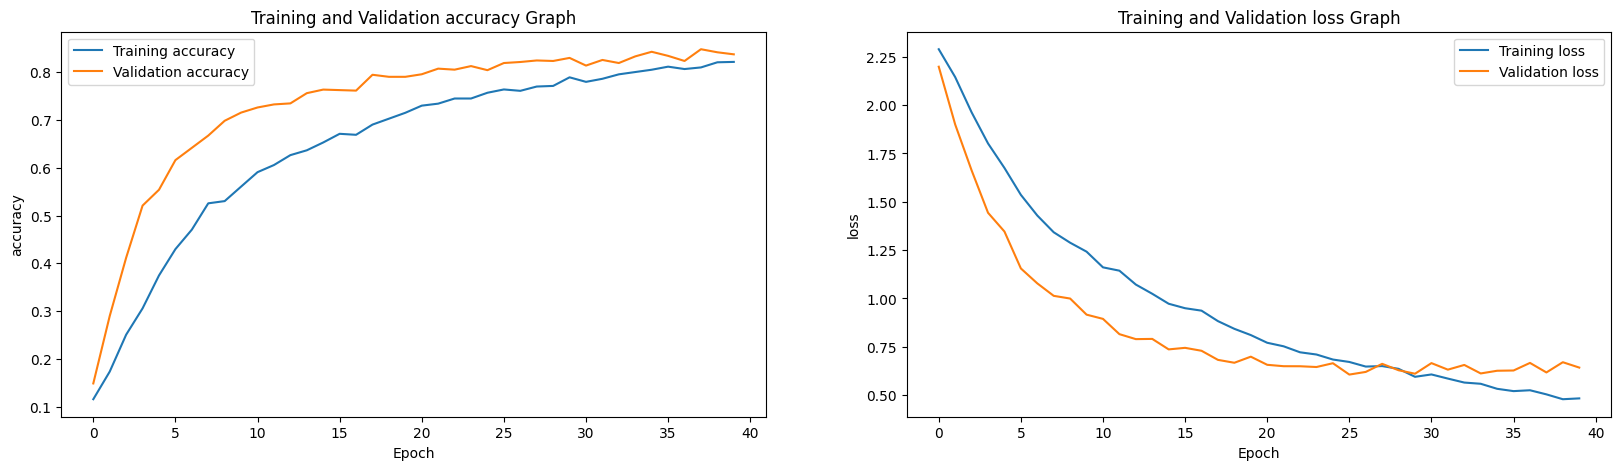

In [26]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.title(f'Training and Validation {metric} Graph')

def graphs(results):
    plt.figure(figsize=(20, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plot_metric(results, 'accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plot_metric(results, 'loss')

    plt.show()

graphs(results)

6/6 [==============================] - 1s 60ms/step


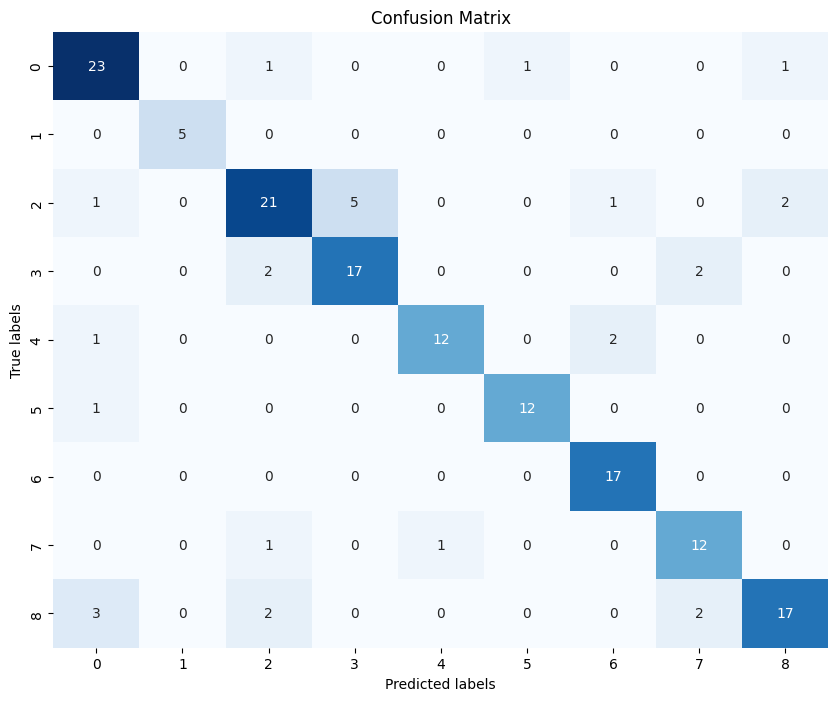

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print("Test Loss: ", test_loss)

6/6 [==============================] - 0s 13ms/step - loss: 0.7592 - accuracy: 0.8242
Testing Accuracy: 82.42%
Test Loss:  0.7592489719390869


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict classes with the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Print the precision, recall, and F1 score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


6/6 [==============================] - 0s 19ms/step
Precision: 0.8489
Recall: 0.8536
F1 Score: 0.8484


Hyperparameter optimized model

In [32]:
import tensorflow as tf

# Define input layer
inputs = tf.keras.Input(shape=(128, 173, 1))

# Convolutional and max pooling layers with increased filters
x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)  # Added Batch Normalization
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)  # Added Batch Normalization
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(x)

# Flatten layer
x = tf.keras.layers.Flatten()(x)

# Dense layers with adjusted dropout
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Reduced dropout rate

x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Reduced dropout rate

x = tf.keras.layers.Dense(32, activation="relu")(x)

# Output layer
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# Create model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 173, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 173, 128)     1280      
                                                                 
 batch_normalization (Batch  (None, 128, 173, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 86, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 86, 256)       295168    
                                                                 
 batch_normalization_1 (Bat  (None, 64, 86, 256)       1024

In [34]:
results = model.fit(X_train, y_train, batch_size=128, epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
49/49 [==============================] - 50s 657ms/step - loss: 4.1065 - accuracy: 0.2003 - val_loss: 2.2921 - val_accuracy: 0.1102
Epoch 2/40
49/49 [==============================] - 20s 405ms/step - loss: 1.6360 - accuracy: 0.4110 - val_loss: 2.2796 - val_accuracy: 0.1102
Epoch 3/40
49/49 [==============================] - 21s 420ms/step - loss: 1.3102 - accuracy: 0.5463 - val_loss: 2.2202 - val_accuracy: 0.1348
Epoch 4/40
49/49 [==============================] - 20s 416ms/step - loss: 1.0240 - accuracy: 0.6607 - val_loss: 2.3154 - val_accuracy: 0.1358
Epoch 5/40
49/49 [==============================] - 21s 424ms/step - loss: 0.8101 - accuracy: 0.7426 - val_loss: 7.5240 - val_accuracy: 0.1551
Epoch 6/40
49/49 [==============================] - 21s 420ms/step - loss: 0.6131 - accuracy: 0.8073 - val_loss: 6.4779 - val_accuracy: 0.1551
Epoch 7/40
49/49 [==============================] - 21s 422ms/step - loss: 0.5052 - accuracy: 0.8420 - val_loss: 2.8173 - val_accuracy: 0.2267

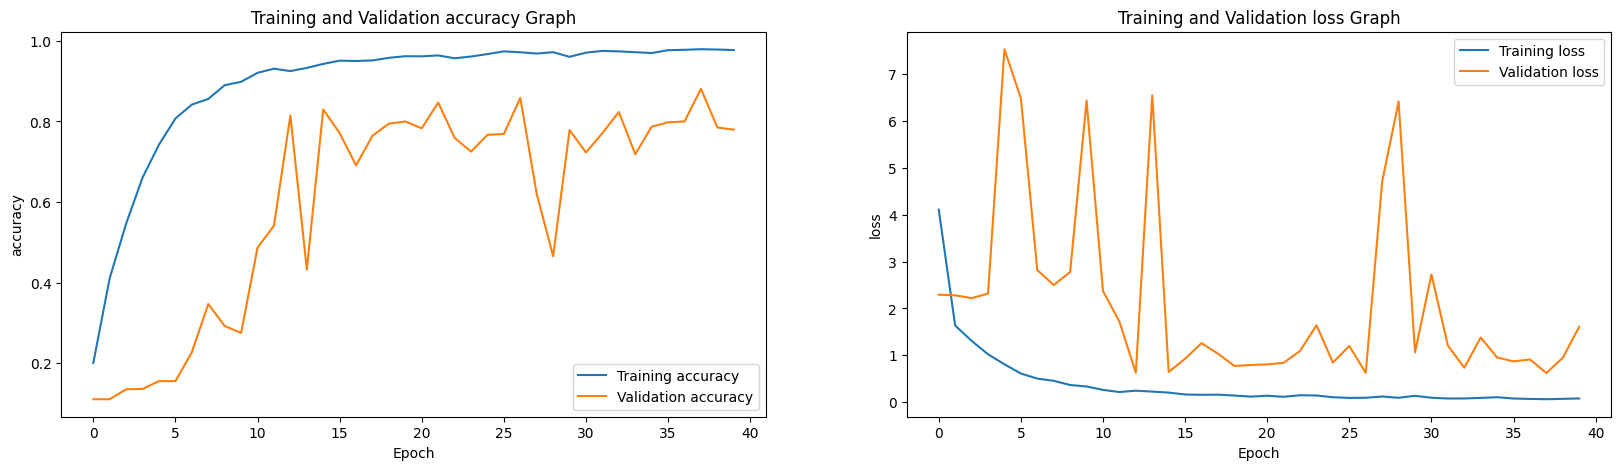

In [35]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.title(f'Training and Validation {metric} Graph')

def graphs(results):
    plt.figure(figsize=(20, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plot_metric(results, 'accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plot_metric(results, 'loss')

    plt.show()

graphs(results)

6/6 [==============================] - 2s 94ms/step


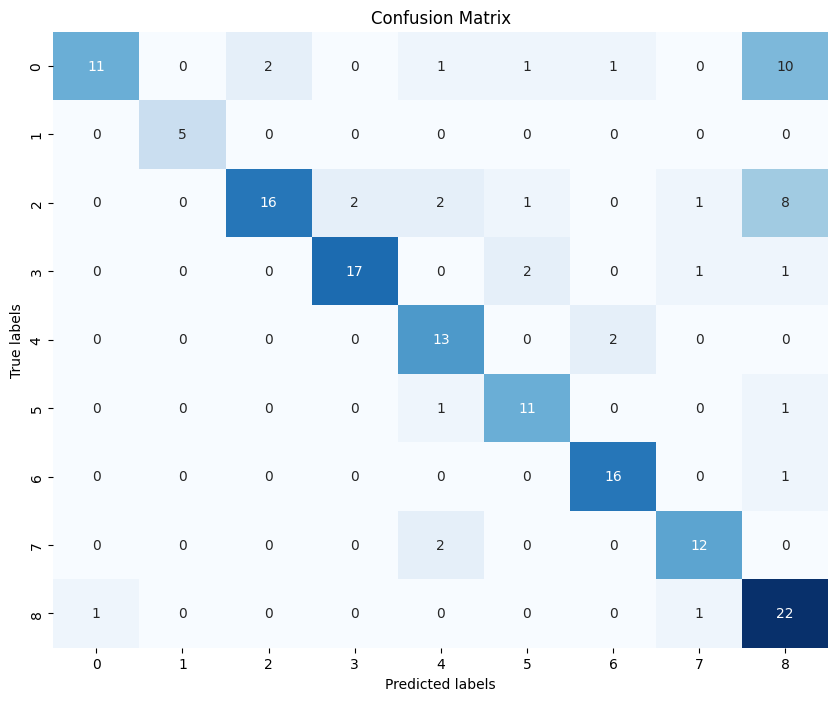

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print("Test Loss: ", test_loss)

6/6 [==============================] - 0s 25ms/step - loss: 1.5369 - accuracy: 0.7455
Testing Accuracy: 74.55%
Test Loss:  1.536901593208313


In [38]:
# Predict classes with the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Print the precision, recall, and F1 score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


6/6 [==============================] - 0s 24ms/step
Precision: 0.8080
Recall: 0.7993
F1 Score: 0.7799


In [39]:
# Convolutional and max pooling layers with increased filters
x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(x)

# Prepare for LSTM layer by reshaping the output of the CNN
x = tf.keras.layers.Reshape(target_shape=(-1, 128))(x)  # Reshape into (sequence_length, features)

# Add LSTM layer
x = tf.keras.layers.LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)(x)

# Dense layers with adjusted dropout
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)

x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)

# Output layer
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# Create model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [40]:
# Model Summary
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 173, 1)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 173, 128)     1280      
                                                                 
 batch_normalization_2 (Bat  (None, 128, 173, 128)     512       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 86, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 86, 256)       295168    
                                                                 
 batch_normalization_3 (Bat  (None, 64, 86, 256)       1024

In [41]:
results = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
49/49 [==============================] - 255s 5s/step - loss: 2.1344 - accuracy: 0.1749 - val_loss: 2.2059 - val_accuracy: 0.1230
Epoch 2/10
49/49 [==============================] - 249s 5s/step - loss: 2.0355 - accuracy: 0.2014 - val_loss: 2.5822 - val_accuracy: 0.1102
Epoch 3/10
49/49 [==============================] - 245s 5s/step - loss: 1.9968 - accuracy: 0.2231 - val_loss: 2.4933 - val_accuracy: 0.1102
Epoch 4/10
49/49 [==============================] - 247s 5s/step - loss: 1.9738 - accuracy: 0.2216 - val_loss: 2.3747 - val_accuracy: 0.1102
Epoch 5/10
49/49 [==============================] - 255s 5s/step - loss: 1.9183 - accuracy: 0.2452 - val_loss: 2.4717 - val_accuracy: 0.0802
Epoch 6/10
49/49 [==============================] - 247s 5s/step - loss: 1.9346 - accuracy: 0.2338 - val_loss: 2.3892 - val_accuracy: 0.1102
Epoch 7/10
49/49 [==============================] - 250s 5s/step - loss: 1.8770 - accuracy: 0.2524 - val_loss: 2.0348 - val_accuracy: 0.1925
Epoch 8/10
49

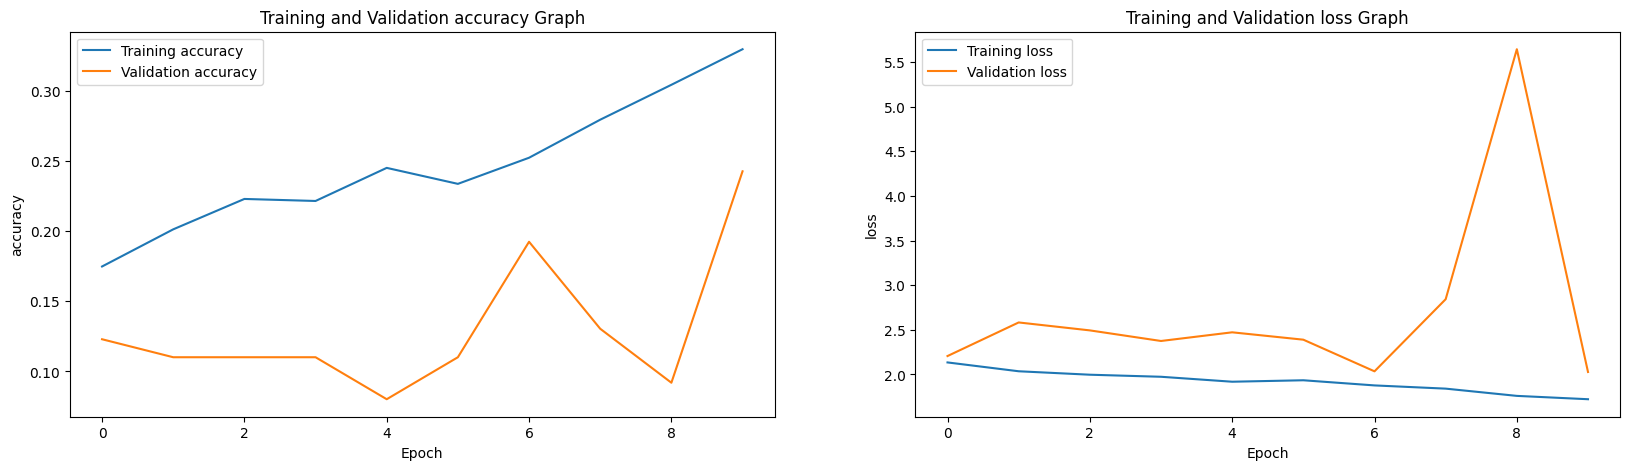

In [42]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.title(f'Training and Validation {metric} Graph')

def graphs(results):
    plt.figure(figsize=(20, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plot_metric(results, 'accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plot_metric(results, 'loss')

    plt.show()

graphs(results)

6/6 [==============================] - 3s 372ms/step


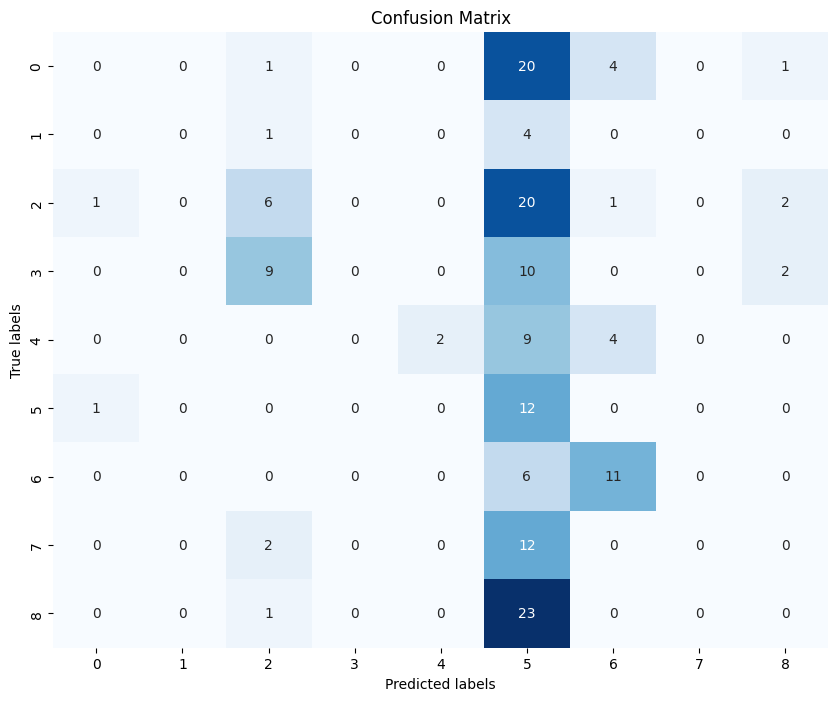

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print("Test Loss: ", test_loss)

6/6 [==============================] - 2s 370ms/step - loss: 2.1967 - accuracy: 0.1879
Testing Accuracy: 18.79%
Test Loss:  2.196742296218872


In [45]:
# Predict classes with the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Print the precision, recall, and F1 score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


6/6 [==============================] - 3s 560ms/step
Precision: 0.2170
Recall: 0.2115
F1 Score: 0.1395


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
def positional_encoding(inputs):
    position, d_model = inputs.shape[1], inputs.shape[2]
    pos_enc = np.array([
        [pos / np.power(10000, 2 * i / d_model) for i in range(d_model)]
        if pos != 0 else np.zeros(d_model)
        for pos in range(position)
    ])
    pos_enc[:, 0::2] = np.sin(pos_enc[:, 0::2])  # dim 2i
    pos_enc[:, 1::2] = np.cos(pos_enc[:, 1::2])  # dim 2i+1
    pos_enc = tf.cast(pos_enc, dtype=tf.float32)
    return inputs + pos_enc

# Define input layer
inputs = tf.keras.Input(shape=(128, 173, 1))

# Convolutional and max pooling layers
x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

# Flatten and add positional encoding
x = tf.keras.layers.Reshape((-1, 128))(x)  # Flatten to sequence
x = tf.keras.layers.Lambda(positional_encoding)(x)

# Transformer encoder
transformer_block = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=128)
x = transformer_block(x, x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)

# Output layer
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# Create and compile the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [59]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128, 173, 1)]        0         []                            
                                                                                                  
 conv2d_15 (Conv2D)          (None, 128, 173, 128)        1280      ['input_5[0][0]']             
                                                                                                  
 max_pooling2d_11 (MaxPooli  (None, 64, 86, 128)          0         ['conv2d_15[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 64, 86, 256)          295168    ['max_pooling2d_11[0][0]

In [60]:
results = model.fit(X_train, y_train, batch_size=128, epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
49/49 [==============================] - 23s 396ms/step - loss: 2.1619 - accuracy: 0.1453 - val_loss: 1.9573 - val_accuracy: 0.1914
Epoch 2/40
49/49 [==============================] - 19s 392ms/step - loss: 1.8142 - accuracy: 0.2887 - val_loss: 1.7066 - val_accuracy: 0.3668
Epoch 3/40
49/49 [==============================] - 19s 389ms/step - loss: 1.5841 - accuracy: 0.4118 - val_loss: 1.4670 - val_accuracy: 0.4342
Epoch 4/40
49/49 [==============================] - 20s 399ms/step - loss: 1.3815 - accuracy: 0.4975 - val_loss: 1.2928 - val_accuracy: 0.5380
Epoch 5/40
49/49 [==============================] - 19s 390ms/step - loss: 1.2641 - accuracy: 0.5550 - val_loss: 1.1714 - val_accuracy: 0.5904
Epoch 6/40
49/49 [==============================] - 19s 392ms/step - loss: 1.0981 - accuracy: 0.6178 - val_loss: 1.0622 - val_accuracy: 0.6492
Epoch 7/40
49/49 [==============================] - 19s 391ms/step - loss: 1.0369 - accuracy: 0.6459 - val_loss: 0.9994 - val_accuracy: 0.6567

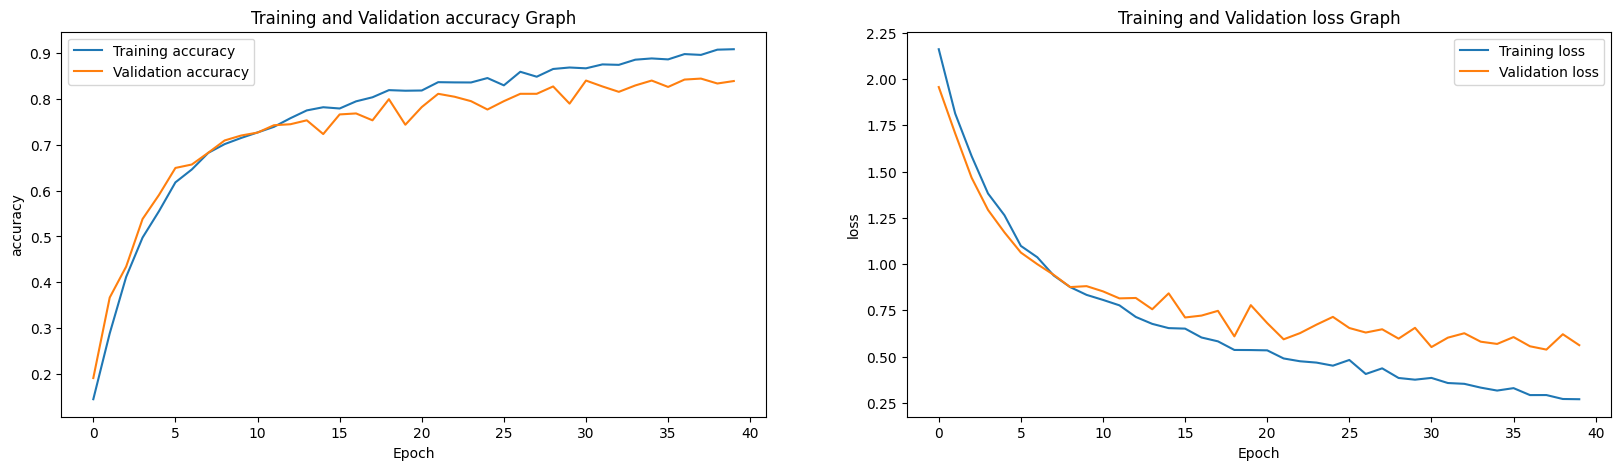

In [61]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.title(f'Training and Validation {metric} Graph')

def graphs(results):
    plt.figure(figsize=(20, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plot_metric(results, 'accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plot_metric(results, 'loss')

    plt.show()

graphs(results)

6/6 [==============================] - 0s 35ms/step


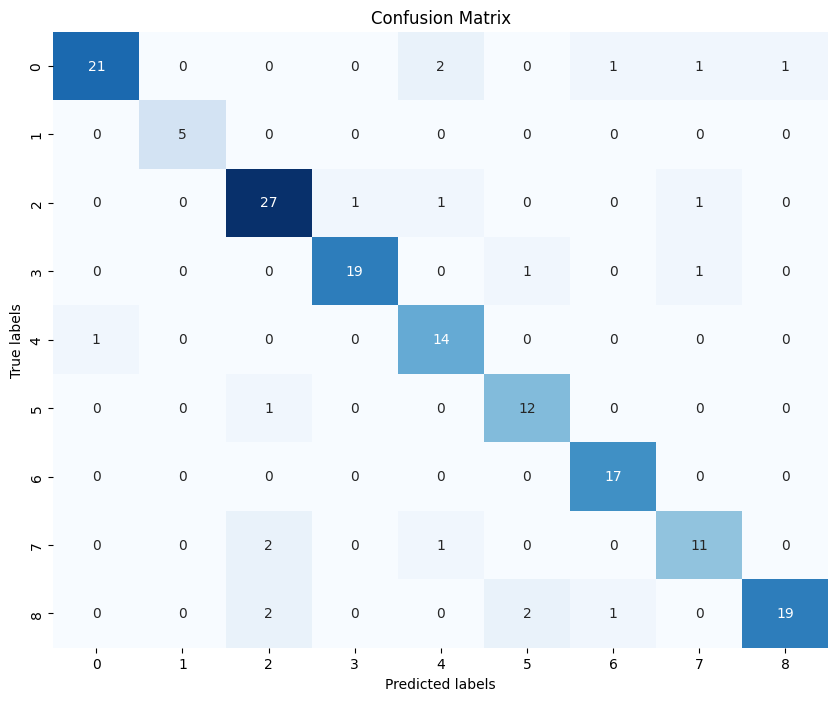

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print("Test Loss: ", test_loss)

6/6 [==============================] - 0s 28ms/step - loss: 0.5093 - accuracy: 0.8788
Testing Accuracy: 87.88%
Test Loss:  0.5093083381652832


In [64]:
# Predict classes with the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Print the precision, recall, and F1 score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

6/6 [==============================] - 0s 26ms/step
Precision: 0.8841
Recall: 0.8940
F1 Score: 0.8858


In [66]:
# Define the path for saving the full model
model_path = '/content/drive/MyDrive/urban_sound_model.h5'

# Save the entire model
model.save(model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
